In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
tags_df = pd.read_csv("dataset/staff_name_tag.csv")
tenders_df = pd.read_csv('dataset/research_relevant_2.csv')

In [2]:
tags_df['Weight'].mean(axis=0)

0.4279929264532511

In [3]:
def bar_number_h(category,value,value2):
    for index in range(len(category)):
        rect=category[index]
        if type(value[index])==type(1): plt.text(value2[index], rect.get_y()+rect.get_height()/2, '%d' %value[index], ha='left', va='center')
        else: plt.text(value2[index], rect.get_y()+rect.get_height()/2, '%0.2f' %value[index], ha='left', va='center')

In [28]:
def draw_graph(re,x_name):
    count = {}
#     for k,v in re.items(): count[k]=len(set(v))
    dic = sorted(re.items(),key=lambda x:x[1],reverse =True)
    Y_axis = np.arange(10)
    x = [i[1] for i in dic[:10][::-1]]
    proportion = plt.barh(Y_axis,x, 0.5, label='number', color='deepskyblue', alpha=1)
    bar_number_h(proportion, x, x)

    plt.yticks(Y_axis, [i[0] for i in dic[:10]][::-1])
    plt.ylabel("Category name")
    plt.xlabel(x_name)
    # plt.legend()
    plt.show()

In [5]:
staffs_ori = {}
staffs_fliter = {}

In [6]:
for i in tags_df.index:
    name = tags_df.loc[i,'Name']
    temp_tag = tags_df.loc[i,'Tag'].lower()
    weight = tags_df.loc[i,'Weight']
#     if weight >= 0.6:
    if name not in staffs_ori.keys(): staffs_ori[name] = [temp_tag+" "]
    else: staffs_ori[name].append(temp_tag+" ")

In [7]:
for i in tags_df.index:
    name = tags_df.loc[i,'Name']
    temp_tag = tags_df.loc[i,'Tag'].lower()
    weight = tags_df.loc[i,'Weight']
    if weight >= 0.5:
        if name not in staffs_fliter.keys(): staffs_fliter[name] = [temp_tag+" "]
        else: staffs_fliter[name].append(temp_tag+" ")

In [8]:
tenders = {}

In [9]:
# for i in tenders_df.index:
#     ID = tenders_df.loc[i,'ATM ID']
#     Category = tenders_df.loc[i,'Category']
#     Description=""
#     if not pd.isnull(tenders_df.loc[i,'Description']):
#         Description= tenders_df.loc[i,'Description']
#     key = ID+':'+Category
#     value = Category+' '+Description
#     tenders[key] = value.lower()

In [10]:
for i in tenders_df.index:
    Category = tenders_df.loc[i,'Category']
    value=Category
    if not pd.isnull(tenders_df.loc[i,'Description']):
        Description= tenders_df.loc[i,'Description']
        value = value+' '+Description
    if Category in tenders.keys(): 
        v = tenders[Category]
        v=value+" "
        tenders[Category] = v.lower()+' '
    else: tenders[Category] = value.lower()+' '


In [11]:
re = {}

In [23]:
staff_list = []
for staff,tags in staffs_ori.items():
    for tag in tags:
        for k,v in tenders.items():
            if tag in v:
                if tag in re.keys():re[tag]+=1
                else: re[tag]=1
               

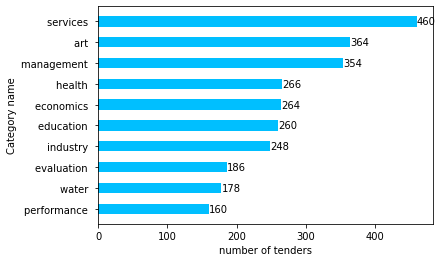

In [29]:
draw_graph(re,'number of tenders')

In [13]:
remain_dic = {}
for staff,tags in staffs_ori.items():
    remain_dic[staff] = list(set.intersection(set(tags),set(staff_list)))

In [21]:
tags_df[(tags_df['Name']=='Mohammad Abualsheikh')][5:]

,Unnamed: 0,Name,Tag,Weight
5,5,Mohammad Abualsheikh,Data compression,0.50
6,6,Mohammad Abualsheikh,Sensors,0.45
7,7,Mohammad Abualsheikh,Machine learning,0.45
8,8,Mohammad Abualsheikh,Jamming,0.45
9,9,Mohammad Abualsheikh,Mobile computing,0.44
...,...,...,...,...
121,121,Mohammad Abualsheikh,Mobile robots,0.79
122,122,Mohammad Abualsheikh,Wireless Sensor Networks,1.00
123,123,Mohammad Abualsheikh,Data Compression,0.85
124,124,Mohammad Abualsheikh,Error Bounds,0.60


In [143]:
remain_dic

{'Mohammad Abualsheikh': ['policy ', 'monitoring '],
 'Misty Adoniou': ['reform ',
  'participation ',
  'experience ',
  'staff ',
  'education ',
  'language '],
 'Ananthan Ambikairajah': ['experience ', 'strategy ', 'testing '],
 'Craig Applegate': [],
 'Hans Asenbaum': ['innovation ', 'participation ', 'expertise '],
 'Regan Ashby': ['safety ', 'conservation '],
 'Marjan Aslan': ['services '],
 'Marjorie Atchan': ['education ', 'income ', 'health ', 'accreditation '],
 'M. Selen Ayirtman Ercan': ['reform ',
  'participation ',
  'public ',
  'innovation ',
  'promotion ',
  'coal '],
 'Sascha-Dominik Dov Bachmann': ['military '],
 'Rachel Bacon': ['health ',
  'resilience ',
  'experience ',
  'staff ',
  'education ',
  'language ',
  'health services ',
  'performance '],
 'Kasia Bail': ['health services research ',
  'economics ',
  'technology ',
  'education ',
  'art ',
  'language ',
  'social welfare '],
 'Jason Bainbridge': ['conservation ', 'research project ', 'authority

In [135]:
avg_pro = []
for staff,remain in remain_dic.items():
    original_len = len(set(staffs_ori[staff]))
    avg_pro.append(len(remain)/original_len)

In [136]:
np.average(avg_pro)

0.060343002375112954

In [70]:
for staff,tags in staffs_ori.items():
    for tag in tags:
        for k,v in tenders.items():
            if tag in v: 
                if k not in re.keys(): re[k]=[staff]
                else: re[k].append(staff)

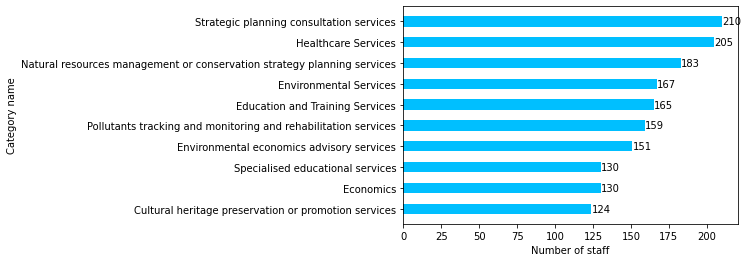

In [71]:
draw_graph(re,"Number of staff")

In [58]:
re2 = {}

In [59]:
for staff,tags in staffs_fliter.items():
    for tag in tags:
        for k,v in tenders.items():
            if tag in v: 
                if k not in re2.keys(): re2[k]=[staff]
                else: re2[k].append(staff)

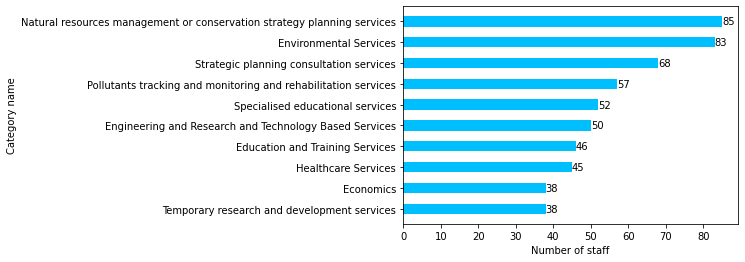

In [60]:
draw_graph(re2,"Number of staff")

In [61]:
tag_list = list(tags_df['Tag'].unique())
compare_list = [t.lower() for t in tag_list]
compare_list = set(compare_list)
temp_df2 = pd.DataFrame(columns = tenders_df.columns)
for t in compare_list:
    res_df = tenders_df[(tenders_df['Description'].str.contains(t))|(tenders_df['Category'].str.contains(t))].copy()
    temp_df2 = pd.concat((temp_df2,res_df))
    temp_df2.drop_duplicates(subset=['ATM ID','Category'], keep='first', inplace=True)

C:\Users\24966\AppData\Local\Temp/ipykernel_16980/1147844979.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  res_df = tenders_df[(tenders_df['Description'].str.contains(t))|(tenders_df['Category'].str.contains(t))].copy()


In [62]:
cate_count_dic = {}
cate_list = list(tenders_df['Category'].unique())
for i in cate_list:
    cate_count_dic[i] = tenders_df[tenders_df['Category']==i]['ATM ID'].unique()

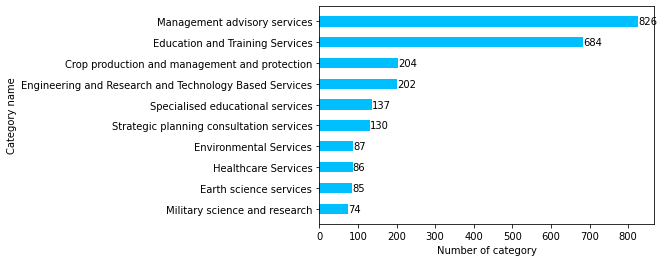

In [63]:
draw_graph(cate_count_dic,"Number of category")

In [29]:
count = {}
for k,v in re.items():
    count[k]=len(set(v))

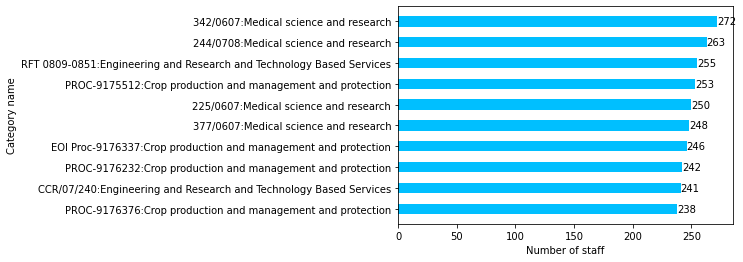

In [36]:
dic = sorted(count.items(),key=lambda x:x[1],reverse =True)
Y_axis = np.arange(10)
x = [i[1] for i in dic[:10][::-1]]
proportion = plt.barh(Y_axis,x, 0.5, label='number', color='deepskyblue', alpha=1)
bar_number_h(proportion, x, x)

plt.yticks(Y_axis, [i[0] for i in dic[:10]][::-1])
plt.ylabel("Category name")
plt.xlabel("Number of staff")
# plt.legend()
plt.show()